<a href="https://colab.research.google.com/github/RomaricKanyamibwa/ForestCoverTypePrediction/blob/master/ForestCoverTypePrediction_Classification_non_balanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
import seaborn as sns
import random
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression,Lasso
from sklearn.model_selection import KFold,cross_val_score   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from time import time
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Restrict minor warnings
import warnings
warnings.filterwarnings('ignore')

In [0]:
#Import Data
col_names=['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40', 'Cover_Type']

data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.data.gz"
covtype=pd.read_csv(data_url,delimiter=",",header =None,names=col_names)

**Training set**

In [0]:
train=covtype.sample(frac=.1,random_state=4)
#Distribution des differents Cover Type
tab=train["Cover_Type"].value_counts(ascending=True)
print(tab)
print(np.sum(tab))

4      273
5      932
6     1691
7     2189
3     3555
1    21197
2    28264
Name: Cover_Type, dtype: int64
58101


**Test set**

In [0]:
testcovtype=covtype.drop(train.index)
outcome_var = 'Cover_Type'

#Normalisation
end=10 #only categorical variables
scaler = StandardScaler()
#we scale to speed up convergence
testcovtype[col_names[:end]]=scaler.fit_transform(testcovtype[col_names[:end]])
testcovtype.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,5.229110e+05,5.229110e+05,5.229110e+05,5.229110e+05,5.229110e+05,5.229110e+05,5.229110e+05,5.229110e+05,5.229110e+05,5.229110e+05,...,522911.000000,522911.000000,522911.000000,522911.000000,522911.000000,522911.000000,522911.000000,522911.000000,522911.000000,522911.000000
mean,5.913591e-16,-8.892128e-17,1.043575e-17,-6.783237e-17,3.913406e-17,-7.305025e-17,1.669720e-16,2.165418e-16,-3.495976e-16,3.478583e-18,...,0.090486,0.077589,0.002777,0.003266,0.000205,0.000503,0.026758,0.023694,0.014993,2.050670
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,0.286877,0.267524,0.052622,0.057058,0.014303,0.022421,0.161375,0.152095,0.121525,1.394787
min,-3.928677e+00,-1.390665e+00,-1.883159e+00,-1.267987e+00,-3.764352e+00,-1.506484e+00,-7.924381e+00,-1.128839e+01,-3.723201e+00,-1.495026e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,-5.361595e-01,-8.724902e-01,-6.815599e-01,-7.596962e-01,-6.764537e-01,-7.974288e-01,-5.280810e-01,-5.210965e-01,-6.146183e-01,-7.232172e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.280597e-01,-2.560411e-01,-1.475157e-01,-2.419931e-01,-2.818890e-01,-2.268511e-01,2.190200e-01,1.360624e-01,1.232280e-02,-2.036432e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,7.279997e-01,9.411210e-01,5.200394e-01,5.392679e-01,3.871556e-01,6.264510e-01,7.046356e-01,6.921199e-01,6.653865e-01,4.307204e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3.209894e+00,1.825592e+00,6.928569e+00,5.306843e+00,9.513610e+00,3.056215e+00,1.563802e+00,1.551481e+00,2.911925e+00,3.921986e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


##  **Selection des Variables**

**Avec feature_importances_**

In [0]:
#Seletion des variables avec l'attribut feature_importances des arbres de classifications
def best_n_features(data,n=10,n_classes=7):
    X = data.iloc[:,:-1]  #independent columns
    y = data.iloc[:,-1]    #target column i.e price range

    model = ExtraTreesClassifier(n_classes)
    model.fit(X,y)
    #print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
    #plot graph of feature importances for better visualization
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    feat_importances.nlargest(n).plot(kind='barh')
    #print(list(feat_importances.nlargest(n).index))
    plt.show()
    return (feat_importances)

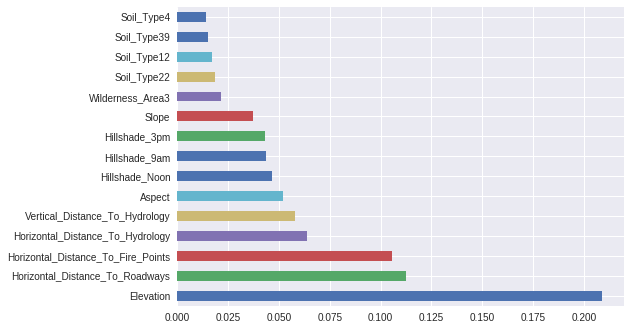

In [0]:
globl_features=best_n_features(covtype,n=15)

**Avec Chi2**

In [0]:
X = covtype.drop(["Cover_Type","Vertical_Distance_To_Hydrology"],axis=1)  #remove label and negative values
y = covtype.iloc[:,-1]    #target column i.e price range
#apply SelectKBest class to extract top 15 best features
bestfeatures = SelectKBest(score_func=chi2, k=15)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(15,'Score'))  #print 15 best features

                                 Specs         Score
4      Horizontal_Distance_To_Roadways  5.766452e+07
8   Horizontal_Distance_To_Fire_Points  3.589090e+07
0                            Elevation  9.479853e+06
3     Horizontal_Distance_To_Hydrology  2.322605e+06
12                    Wilderness_Area4  2.949092e+05
1                               Aspect  2.146782e+05
2                                Slope  1.714326e+05
22                         Soil_Type10  1.219068e+05
16                          Soil_Type4  6.637906e+04
50                         Soil_Type38  6.569458e+04
7                        Hillshade_3pm  6.358794e+04
5                        Hillshade_9am  6.339071e+04
51                         Soil_Type39  6.212286e+04
15                          Soil_Type3  6.109861e+04
14                          Soil_Type2  5.495303e+04


In [0]:
n_feat=20#number of features
feat=featureScores.nlargest(n_feat,'Score')
list_feat=list(feat['Specs'])
predictors=[list_feat,list(globl_features.nlargest(n_feat).index)] #Our list of features
type_pred=[" Chi2Sel"," FeatImpo"]

# **Construction des Modeles Predictifs**

In [0]:
#fonction generique pour un classifieur et sa performance:
def classification_model(model, train_data,test_data, predictors, outcome,cross_valid=True):
    #entrainement du model:
    tp_d=time()
    model.fit(train_data[predictors],train_data[outcome])
    tr_time = time()-tp_d

    #predictions sur le test set:
    predictions = model.predict(test_data[predictors])

    #affichage de l'accuracy
    accuracy = metrics.accuracy_score(predictions,test_data[outcome])
    print ("\tAccuracy : %s" % "{0:.3%}".format(accuracy))

    #Perform k-fold cross-validation with 5 folds
    #kf = KFold(n_splits = 10, shuffle = True)#, random_state = 2
    if(cross_valid):
        error = cross_val_score(model,data[predictors],train_data[outcome], cv=5,n_jobs=4)
        print ("\tCross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))
        #Fit the model again so that it can be refered outside the function:
        model.fit(train_data[predictors],data[outcome])
    else:
        error=[0]

    return accuracy,tr_time,len(predictors),np.mean(error)

In [0]:
outcome_var = 'Cover_Type'
end=10 #only categorical variables
scaler = StandardScaler()
#we scale to speed up convergence
scaled_train=train.copy()
scaled_train[col_names[:end]]=scaler.fit_transform(scaled_train[col_names[:end]])
#scaled_train.describe()

In [0]:
TrainingTime=[]
Accuracy=[]
Nb_Features=[]
Classifier=[]
Cross_Validation=[]

In [0]:
names = ["Logit"#,"Lasso"
         ,"Nearest Neighbors", "Linear SVM", "RBF SVM",
         #"Gaussian Process",
         "Decision Tree", "Random Forest 7","Random Forest 100","Random Forest 500",
         "ExtraTreesClassifier 100","ExtraTreesClassifier 500",
         "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    LogisticRegression(solver='lbfgs',multi_class='auto',max_iter = 450,n_jobs=4),
    #Lasso(alpha=0.1, copy_X=True),
    KNeighborsClassifier(7,n_jobs=4),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    #GaussianProcessClassifier(1.0 * RBF(1.0),n_jobs=4),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=15,n_jobs=4,bootstrap=True),
    RandomForestClassifier(max_depth=5, n_estimators=100, max_features=15,n_jobs=4,bootstrap=True),
    RandomForestClassifier(max_depth=5, n_estimators=500, max_features=15,n_jobs=4,bootstrap=True),
    ExtraTreesClassifier(max_depth=5, n_estimators=100, max_features=15,n_jobs=4,bootstrap=True),
    ExtraTreesClassifier(max_depth=5, n_estimators=500, max_features=15,n_jobs=4,bootstrap=True),
    MLPClassifier(alpha= 0.0001,max_iter=450),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

**Training and Testing with Chi2 et FeatImpo selection**

In [0]:
for clsf_index,clsf in enumerate(classifiers):
    print("--------",names[clsf_index]," with ",n_feat," best feature(s)","--------")
    for k,pred in enumerate(predictors):
        print("\t---",type_pred[k])
        accuracy,tr_time,nb_features,cross_val=classification_model(
        clsf, train_data=scaled_train,test_data=testcovtype,
        predictors=pred,outcome=outcome_var,cross_valid=False)
  
        classifier_type=names[clsf_index]+type_pred[k]
    
        TrainingTime.append(tr_time)
        Accuracy.append(accuracy)
        Nb_Features.append(nb_features)
        Classifier.append(classifier_type)
        Cross_Validation.append(cross_val)

-------- Logit  with  20  best feature(s) --------
	---  Chi2Sel
	Accuracy : 71.426%
-------- Nearest Neighbors  with  20  best feature(s) --------
	---  Chi2Sel
	Accuracy : 82.117%
-------- Linear SVM  with  20  best feature(s) --------
	---  Chi2Sel
	Accuracy : 71.266%
-------- RBF SVM  with  20  best feature(s) --------
	---  Chi2Sel
	Accuracy : 84.024%
-------- Decision Tree  with  20  best feature(s) --------
	---  Chi2Sel
	Accuracy : 70.057%
-------- Random Forest 7  with  20  best feature(s) --------
	---  Chi2Sel
	Accuracy : 70.738%
-------- Random Forest 100  with  20  best feature(s) --------
	---  Chi2Sel
	Accuracy : 70.741%
-------- Random Forest 500  with  20  best feature(s) --------
	---  Chi2Sel
	Accuracy : 70.827%
-------- ExtraTreesClassifier 100  with  20  best feature(s) --------
	---  Chi2Sel
	Accuracy : 69.193%
-------- ExtraTreesClassifier 500  with  20  best feature(s) --------
	---  Chi2Sel
	Accuracy : 68.887%
-------- Neural Net  with  20  best feature(s) ----

In [0]:
d = {'Type of Classifier':Classifier,'Number of Features':Nb_Features,
     'Training Time': TrainingTime, 'Accuracy': Accuracy,'Cross-Validation':Cross_Validation}

df3 = pd.DataFrame(data=d)
df3 = df3[list(d.keys())]
df3.sort_values(by=['Accuracy'],ascending=False).head(50)

**Training with Manualy selected features**

In [0]:
names = ["Logit"#,"Lasso"
         ,"Nearest Neighbors", "Linear SVM", "RBF SVM",
         #"Gaussian Process",
         "Decision Tree", "Random Forest 7","Random Forest 100","Random Forest 500",
         "ExtraTreesClassifier 100","ExtraTreesClassifier 500",
         "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    LogisticRegression(solver='lbfgs',multi_class='auto',max_iter = 450,n_jobs=4),
    #Lasso(alpha=0.1, copy_X=True),
    KNeighborsClassifier(7,n_jobs=4),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    #GaussianProcessClassifier(1.0 * RBF(1.0),n_jobs=4),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=7,n_jobs=4,bootstrap=True),
    RandomForestClassifier(max_depth=5, n_estimators=100, max_features=7,n_jobs=4,bootstrap=True),
    RandomForestClassifier(max_depth=5, n_estimators=500, max_features=7,n_jobs=4,bootstrap=True),
    ExtraTreesClassifier(max_depth=5, n_estimators=100, max_features=7,n_jobs=4,bootstrap=True),
    ExtraTreesClassifier(max_depth=5, n_estimators=500, max_features=7,n_jobs=4,bootstrap=True),
    MLPClassifier(alpha= 0.0001,max_iter=450),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

In [0]:
predictors= [['Elevation','Aspect' ,'Slope', 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology' ,'Hillshade_3pm' ,'Wilderness_Area3']]

type_pred= ["important features"]
for clsf_index,clsf in enumerate(classifiers):
    print("--------",names[clsf_index]," with 7 best features","--------")
    for k,pred in enumerate(predictors):
        print("\t---",type_pred[k])
        accuracy,tr_time,nb_features,cross_val=classification_model(
        clsf, train_data=scaled_train,test_data=testcovtype,
        predictors=pred,outcome=outcome_var,cross_valid=False)
  
        classifier_type=names[clsf_index]+type_pred[k]

        TrainingTime.append(tr_time)
        Accuracy.append(accuracy)
        Nb_Features.append(nb_features)
        Classifier.append(classifier_type)
        Cross_Validation.append(cross_val)

-------- Decision Tree  with 7 best features --------
	--- important features
	Accuracy : 69.249%
-------- Random Forest 7  with 7 best features --------
	--- important features
	Accuracy : 69.715%
-------- Random Forest 100  with 7 best features --------
	--- important features
	Accuracy : 69.736%
-------- Random Forest 500  with 7 best features --------
	--- important features
	Accuracy : 69.725%
-------- ExtraTreesClassifier 100  with 7 best features --------
	--- important features
	Accuracy : 68.152%
-------- ExtraTreesClassifier 500  with 7 best features --------
	--- important features
	Accuracy : 67.935%
-------- Neural Net  with 7 best features --------
	--- important features
	Accuracy : 73.297%
-------- AdaBoost  with 7 best features --------
	--- important features
	Accuracy : 46.369%
-------- Naive Bayes  with 7 best features --------
	--- important features
	Accuracy : 60.538%
-------- QDA  with 7 best features --------
	--- important features
	Accuracy : 0.473%


In [59]:
d = {'Type of Classifier':Classifier,'Number of Features':Nb_Features,
     'Training Time': TrainingTime, 'Accuracy': Accuracy,'Cross-Validation':Cross_Validation}

df = pd.DataFrame(data=d)
df = df[list(d.keys())]
df.sort_values(by=['Accuracy'],ascending=False).head(50)

,Type of Classifier,Number of Features,Training Time,Accuracy,Cross-Validation
17,RBF SVM FeatImpo,20,3131.476452,0.847590,0.0
3,RBF SVM Chi2Sel,20,2773.267598,0.840239,0.0
15,Nearest Neighbors FeatImpo,20,0.221105,0.828554,0.0
1,Nearest Neighbors Chi2Sel,20,0.106862,0.821170,0.0
24,Neural Net FeatImpo,20,140.358320,0.811102,0.0
10,Neural Net Chi2Sel,20,381.993305,0.802146,0.0
31,RBF SVMimportant features,7,389.025991,0.754251,0.0
29,Nearest Neighborsimportant features,7,0.058918,0.738456,0.0
39,Neural Netimportant features,7,80.309711,0.732974,0.0
14,Logit FeatImpo,20,49.083575,0.718489,0.0
